In [24]:
# 한글폰트 (설치 후 커널재시작!)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/X11: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/X11/Type1: caching, new cache contents: 8 fonts, 0 dirs
/usr/share/fonts/X11/encodings: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/X11/encodings/large: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/X11/misc: caching, new cache contents: 89 fonts, 0 dirs
/usr/share/fonts/X11/util: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cMap: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/cmap/adobe-cns1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-gb1: caching, new cache contents: 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re

plt.rcParams['font.size'] = 15
%matplotlib inline
matplotlib.font_manager._rebuild() 
plt.rc('font', family='NanumBarunGothic')

import warnings 
warnings.filterwarnings(action='ignore')

# 0. 데이터로드

In [150]:
train = pd.read_csv('train_수정.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

**train데이터**
- 2016-02-01\~2021-01-26의 데이터(평일만)
- shape: 1205 rows × 12 columns
- 12 columns: 일자/요일/본사정원수/본사휴가자수/본사출장자수/시간외근무명령서승인건수/현본사소속재택근무자수/조식메뉴/중식메뉴/석식메뉴/중식계/석식계


<br>

**test데이터**
- 2021-01-27\~2021-04-09의 데이터(평일만)
- shape: 50 rows × 10 columns
- 10 columns: 일자/요일/본사정원수/본사휴가자수/본사출장자수/시간외근무명령서승인건수/현본사소속재택근무자수/조식메뉴/중식메뉴/석식메뉴

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              50 non-null     object 
 1   요일              50 non-null     object 
 2   본사정원수           50 non-null     int64  
 3   본사휴가자수          50 non-null     int64  
 4   본사출장자수          50 non-null     int64  
 5   본사시간외근무명령서승인건수  50 non-null     int64  
 6   현본사소속재택근무자수     50 non-null     float64
 7   조식메뉴            50 non-null     object 
 8   중식메뉴            50 non-null     object 
 9   석식메뉴            50 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.0+ KB


In [7]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   일자      50 non-null     object
 1   중식계     50 non-null     int64 
 2   석식계     50 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


# 1. 데이터 전처리

## 칼럼명 변경

In [151]:
cols = {'본사정원수':'정원수', 
                     '본사휴가자수':'휴가', 
                     '본사출장자수':'출장', 
                     '본사시간외근무명령서승인건수':'야근', 
                     '현본사소속재택근무자수':'재택근무'}

train.rename(columns=cols, inplace = True)
test.rename(columns=cols, inplace = True)

train

,일자,요일,정원수,휴가,출장,야근,재택근무,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0


## 칼럼 추가

In [184]:
# 일자에서 '월', '연도' 추출
train['월'] = pd.to_datetime(train['일자']).dt.month
train['연도'] = pd.to_datetime(train['일자']).dt.year

# 전체 출근인원대비 중식계, 석식계 비율 추가
train['중식계비율'] = train['중식계'] / (train['정원수'] - train['휴가'] - train['출장'] - train['재택근무'])
train['석식계비율'] = train['석식계'] / (train['정원수'] - train['휴가'] - train['출장'] - train['재택근무'])

# 전체 인원대비 휴가, 출장, 야근, 재택근무 비율
train['휴가비율'] = train['휴가'] / train['정원수']
train['출장비율'] = train['출장'] / train['정원수']
train['야근비율'] = train['야근'] / train['정원수']
train['재택근무비율'] = train['재택근무'] / train['정원수']

test['휴가비율'] = test['휴가'] / test['정원수']
test['출장비율'] = test['출장'] / test['정원수']
test['야근비율'] = test['야근'] / test['정원수']
test['재택근무비율'] = test['재택근무'] / test['정원수']

# 출근비율
train['출근비율'] = (train['정원수']-(train['휴가']+train['출장']+train['재택근무']))/train['정원수']
test['출근비율'] = test['정원수']-(test['휴가']+test['출장']+test['재택근무'])/test['정원수']

train.columns

Index(['일자', '요일', '정원수', '휴가', '출장', '야근', '재택근무', '중식메뉴', '석식메뉴', '중식계',
       '석식계', '월', '연도', '중식계비율', '석식계비율', '휴가비율', '출장비율', '야근비율', '재택근무비율',
       '출근비율', '중식메뉴_menu1', '중식메뉴_menu2', '중식메뉴_menu3', '석식메뉴_menu1',
       '석식메뉴_menu2', '석식메뉴_menu3'],
      dtype='object')

## 데이터 제거

- '석식계'==0인 행 제거

In [154]:
train.describe()

,정원수,휴가,출장,야근,재택근무,중식계,석식계,월,연도,중식계비율,석식계비율,휴가비율,출장비율,야근비율,재택근무비율,출근비율
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,2807.815768,157.913693,241.142739,274.117012,43.506224,890.334440,461.772614,6.512033,2018.052282,0.376458,0.195460,0.055721,0.086247,0.097200,0.014491,0.843541
std,171.264404,144.190572,43.532298,246.239651,109.937400,209.505057,139.179202,3.453906,1.433958,0.085110,0.058032,0.050230,0.016511,0.085867,0.036577,0.056605
min,2601.000000,23.000000,41.000000,0.000000,0.000000,296.000000,0.000000,1.000000,2016.000000,0.143649,0.000000,0.008475,0.014576,0.000000,0.000000,0.520288
25%,2645.000000,71.000000,217.000000,4.000000,0.000000,758.000000,406.000000,4.000000,2017.000000,0.317741,0.172010,0.025692,0.076853,0.001330,0.000000,0.819350
50%,2760.000000,105.000000,245.000000,299.000000,0.000000,879.000000,483.000000,7.000000,2018.000000,0.371933,0.203690,0.037348,0.088034,0.110518,0.000000,0.865597
75%,2962.000000,185.000000,272.000000,452.000000,0.000000,1032.000000,545.000000,9.000000,2019.000000,0.432010,0.230567,0.065628,0.098444,0.162923,0.000000,0.882666
max,3305.000000,1224.000000,378.000000,1044.000000,533.000000,1459.000000,905.000000,12.000000,2021.000000,0.597203,0.380270,0.464164,0.121115,0.387640,0.180678,0.934087


'석식계'의 최솟값이 0이다. <br>
어떤 경우에 0이되는지 살펴보자.

In [155]:
train[train['석식계']==0]

,일자,요일,정원수,휴가,출장,야근,재택근무,조식메뉴,중식메뉴,석식메뉴,...,석식계,월,연도,중식계비율,석식계비율,휴가비율,출장비율,야근비율,재택근무비율,출근비율
204,2016-11-30,수,2689,68,207,0,0.0,모닝롤/카스텔라 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 고추장찌개 ...,나물비빔밥 (쌀:국내산) 가쯔오장국 치킨핑거*요거트D 감자샐러드 오복지무침 ...,*,...,0.0,11,2016,0.459403,0.0,0.025288,0.076980,0.000000,0.000000,0.897731
224,2016-12-28,수,2705,166,225,0,0.0,모닝롤/고구마파이 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 북어계란국 ...,콩나물밥 (쌀:국내산) 가쯔오장국 미트볼케찹조림 꽃맛살샐러드 군고구마 배추겉...,*,...,0.0,12,2016,0.331461,0.0,0.061368,0.083179,0.000000,0.000000,0.855453
244,2017-01-25,수,2697,79,203,0,0.0,모닝롤/토마토샌드 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 ...,카레덮밥 (쌀:국내산) 맑은국 유린기 개성감자만두 오이사과무침 포기김치 (김...,*,...,0.0,1,2017,0.298137,0.0,0.029292,0.075269,0.000000,0.000000,0.895439
262,2017-02-22,수,2632,75,252,0,0.0,모닝롤/브라우니 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 꽃게탕 명엽채...,나물비빔밥 (쌀:국내산) 유부장국 생선까스*탈탈소스 파스타샐러드 마늘쫑볶음 ...,*,...,0.0,2,2017,0.462039,0.0,0.028495,0.095745,0.000000,0.000000,0.875760
281,2017-03-22,수,2627,53,235,0,0.0,모닝롤/찐빵 우유/주스 계란후라이 김치죽/쌀밥 (쌀:국내산) 콩나물국 김실파무침...,쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개 유린기 비엔나볶음 세발나물 깍두기 (...,*,...,0.0,3,2017,0.407439,0.0,0.020175,0.089456,0.000000,0.000000,0.890369
306,2017-04-26,수,2626,45,304,0,0.0,모닝롤/와플 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 된장찌개 검정콩조...,비빔밥 (쌀:국내산) 맑은국 오징어튀김 견과류조림 하와이안샐러드 깍두기 (김...,*,...,0.0,4,2017,0.366711,0.0,0.017136,0.115765,0.000000,0.000000,0.867098
327,2017-05-31,수,2637,43,265,0,0.0,모닝롤/베이글 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 자...,열무보리비빔밥 (쌀:국내산) 가쯔오장국 탕수만두 콥샐러드 오이지무침 포기김치...,자기계발의날,...,0.0,5,2017,0.390726,0.0,0.016306,0.100493,0.000000,0.000000,0.883201
346,2017-06-28,수,2648,58,259,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 쇠고기매운국 고...,콩나물밥 (쌀:국내산) 얼갈이된장국 삼치구이 잡채 아삭고추무침 깍두기 (김치...,*자기계발의날*,...,0.0,6,2017,0.319605,0.0,0.021903,0.097810,0.000000,0.000000,0.880287
366,2017-07-26,수,2839,254,246,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 민물새우찌개 숙...,나물비빔밥 미소장국 파스타샐러드 소세지오븐구이 오렌지 포기김치 (김치:국내산),가정의날,...,0.0,7,2017,0.340744,0.0,0.089468,0.086650,0.000000,0.000000,0.823882
392,2017-09-01,금,2642,177,303,45,0.0,모닝롤/단팥빵 우유/주스 계란후라이 단호박죽/쌀밥 (쌀:국내산) 대구찌개 깻순나...,쌀밥/잡곡밥 (쌀:국내산) 시래기국 훈제오리구이 두부구이*양념장 쌈무/양파절임...,*,...,0.0,9,2017,0.306660,0.0,0.066995,0.114686,0.017033,0.000000,0.818319


- 모두 수요일이다.
- '자기개발의 날'에는 석식을 운영하지 않는다.

위 데이터를 제거하자.

In [156]:
idx = train[train['석식계']==0].index
train.drop(idx, inplace=True)

train

,일자,요일,정원수,휴가,출장,야근,재택근무,조식메뉴,중식메뉴,석식메뉴,...,석식계,월,연도,중식계비율,석식계비율,휴가비율,출장비율,야근비율,재택근무비율,출근비율
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",...,331.0,2,2016,0.432736,0.137859,0.019223,0.057670,0.091503,0.000000,0.923106
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",...,560.0,2,2016,0.364592,0.235492,0.019223,0.066513,0.122645,0.000000,0.914264
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",...,573.0,2,2016,0.430021,0.242283,0.021530,0.069204,0.042676,0.000000,0.909266
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",...,525.0,2,2016,0.429513,0.230567,0.039985,0.084583,0.136486,0.000000,0.875433
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",...,330.0,2,2016,0.431839,0.154062,0.106882,0.069589,0.013072,0.000000,0.823529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,...,421.0,1,2021,0.471324,0.181544,0.025142,0.066376,0.001341,0.131076,0.777405
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,...,353.0,1,2021,0.360329,0.152880,0.030841,0.077439,0.154878,0.117667,0.774053
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,...,217.0,1,2021,0.265962,0.099678,0.085484,0.083138,0.000335,0.101576,0.729802
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,...,502.0,1,2021,0.477880,0.209516,0.035870,0.051291,0.206504,0.109621,0.803218


- '조식메뉴' 칼럼 제거

In [157]:
train.drop('조식메뉴', axis=1, inplace=True)
test.drop('조식메뉴', axis=1, inplace=True)

## 메뉴 분리

**1) 중식메뉴**
- 함수로 메뉴개수를 살펴보면 메뉴개수는 6 또는 7, 가끔 8임을 알 수 있다.
- 0\~1066번 행: **밥-국/찌개-반찬3~4개-디저트-김치** 순서로 메뉴가 구성되어 있다.
- 1067번 행: **밥-국/찌개-반찬3~4개-김치-디저트**
- 단, 메뉴가 6개일 때는 디저트는 없으며, 메뉴가 8개인 경우는 간혹 반찬이 4개인 경우이다.
- 샐러드는 반찬에 포함될 때도, 디저트에 포함될 때도 있다.


In [101]:
def split_menu(df):
    for i in range(len(df)):
        low = df.iloc[i]
        low = re.sub(r"\([^\)]+\)", "", low)      # 소괄호부분 제거
        list = low.replace('(New)', '').replace('   ', ' ').replace('  ', ' ').strip().split(' ')  # 공백처리 후 문자열 분리
        
        
        print(len(list), end=' ')
        
        if len(list) == 8:
            print()
            print(list)
            
split_menu(train['중식메뉴'])

7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 6 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 6 6 6 6 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 

**2) 석식메뉴**
- 메뉴개수는 6 또는 7이다.
- **밥-국/찌개-반찬2~3개-디저트-김치** 순서로 메뉴가 구성되어 있다.
- 간혹 국과 메인반찬의 순서가 뒤바뀐 경우가 있다.

In [102]:
def split_menu(df):
    
    for i in range(len(df)):
        low = df.iloc[i]
        low = re.sub(r"\([^\)]+\)", "", low)      # 소괄호부분 제거
        list = low.replace('(New)', '').replace('   ', ' ').replace('  ', ' ').strip().split(' ')  # 공백처리 후 문자열 분리
        print(len(list), end=' ')
        
        if len(list)<6:
            print()
            print(i)
            print(list)

split_menu(train['석식메뉴'])

6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 

In [158]:
train.iloc[565]

일자                                               2018-06-22
요일                                                        금
정원수                                                    2728
휴가                                                      178
출장                                                      305
야근                                                       50
재택근무                                               0.000000
중식메뉴      쌀밥/잡곡밥 (쌀:국내산) 닭개장  코다리강정  잡채  도토리묵무침  포기김치 (김...
석식메뉴                                                *      
중식계                                              552.000000
석식계                                              448.000000
월                                                         6
연도                                                     2018
중식계비율                                              0.245880
석식계비율                                              0.199555
휴가비율                                               0.065249
출장비율                                    

565번 행은 석식메뉴가 없으므로 제거한다.

In [159]:
train.drop(train.index[565], inplace=True)

메뉴들을 살펴본 결과, 메인메뉴로 추정되는 2,3,4번째만을 사용하기로 정했다.

In [160]:
def get_main_menu(df, col):
    df_res = df
    df = df[col]
    
    menu1=[]
    menu2=[]
    menu3=[]
    for i in range(len(df)):
        low = df.iloc[i]
        low = re.sub(r"\([^\)]+\)", "", low)      # 소괄호부분 제거
        list = low.replace('(New)', '').replace('   ', ' ').replace('  ', ' ').strip().split(' ')  # 공백처리 후 문자열 분리

        menu1.append(list[1])
        menu2.append(list[2])
        menu3.append(list[3])
    
    
    df_res[col+'_menu1'] = menu1
    df_res[col+'_menu2'] = menu2
    df_res[col+'_menu3'] = menu3
    
    return df_res

train = get_main_menu(train, '중식메뉴')
train = get_main_menu(train, '석식메뉴')
train[:3]

,일자,요일,정원수,휴가,출장,야근,재택근무,중식메뉴,석식메뉴,중식계,...,출장비율,야근비율,재택근무비율,출근비율,중식메뉴_menu1,중식메뉴_menu2,중식메뉴_menu3,석식메뉴_menu1,석식메뉴_menu2,석식메뉴_menu3
0,2016-02-01,월,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,...,0.057670,0.091503,0.0,0.923106,오징어찌개,쇠불고기,계란찜,육개장,자반고등어구이,두부조림
1,2016-02-02,화,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,...,0.066513,0.122645,0.0,0.914264,김치찌개,가자미튀김,모둠소세지구이,어묵국,유산슬,아삭고추무침
2,2016-02-03,수,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,...,0.069204,0.042676,0.0,0.909266,팽이장국,치킨핑거,쫄면야채무침,청국장찌개,황태양념구이,고기전


In [185]:
test = get_main_menu(test, '중식메뉴')
test = get_main_menu(test, '석식메뉴')
test[:3]

,일자,요일,정원수,휴가,출장,야근,재택근무,중식메뉴,석식메뉴,출근비율,재택근무비율,휴가비율,출장비율,야근비율,중식메뉴_menu1,중식메뉴_menu2,중식메뉴_menu3,석식메뉴_menu1,석식메뉴_menu2,석식메뉴_menu3
0,2021-01-27,수,2983,88,182,5,358.0,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치,2982.789474,0.120013,0.029501,0.061012,0.001676,대구지리,매운돈갈비찜,오꼬노미계란말이,얼큰순두부찌개,쇠고기우엉볶음,버섯햄볶음
1,2021-01-28,목,2983,104,212,409,348.0,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지,2982.777405,0.116661,0.034864,0.071069,0.137110,우렁된장찌개,오리주물럭,청양부추전,우동국물,오징어무침,꽃맛살샐러드
2,2021-01-29,금,2983,270,249,0,294.0,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치,2982.727456,0.098558,0.090513,0.083473,0.000000,팽이장국,수제돈까스*소스,가자미조림,물만둣국,카레찜닭,숯불양념꼬지어묵


In [161]:
print(train['중식메뉴_menu1'].nunique(), train['중식메뉴_menu2'].nunique(), train['중식메뉴_menu3'].nunique())

268 380 456


In [162]:
print(train['석식메뉴_menu1'].nunique(), train['석식메뉴_menu2'].nunique(), train['석식메뉴_menu3'].nunique())

284 435 503


# 2. EDA (탐색적 분석)

**상관 계수**: 두 연속형 변수 사이의 선형 상관 관계를 나타냄
- 양이면 양의 선형 상관 관계
- 음이면 음의 선형 상관 관계
- 0이면 상관 관계 없음

<br>

- 절댓값이 1.0과 0.7 사이이면, 강한 선형관계
- 절댓값이 0.7과 0.3 사이이면, 뚜렷한 선형관계
- 절댓값이 0.3과 0.1 사이이면, 약한 선형관계
- 절댓값이 0.1과 0 사이이면, 거의 무시될 수 있는 선형관계

<br>

[참고1) 파이썬(Python)을 이용한 피어슨 상관계수 구하기](https://kiyoja07.blogspot.com/2019/03/python.html) <br>
[참고2) Python 상관관계 분석](https://gomguard.tistory.com/173) <br>
[참고2) 상관 계수](https://wikidocs.net/78784)

In [163]:
train_temp = train.drop(columns=['휴가','출장','야근','재택근무','중식계','석식계'])
train_temp.corr()   # 수치데이터가 아닌 열은 무시

,정원수,월,연도,중식계비율,석식계비율,휴가비율,출장비율,야근비율,재택근무비율,출근비율
정원수,1.000000,0.244829,0.767590,-0.270061,-0.409083,0.169345,-0.360278,0.081015,0.456139,-0.341332
월,0.244829,1.000000,-0.089430,-0.152691,-0.171516,0.174856,0.125100,0.001537,0.027381,-0.208795
연도,0.767590,-0.089430,1.000000,-0.183082,-0.371382,0.077625,-0.334258,0.135168,0.576929,-0.346113
중식계비율,-0.270061,-0.152691,-0.183082,1.000000,0.612746,-0.222404,-0.461070,0.493242,0.130372,0.245979
석식계비율,-0.409083,-0.171516,-0.371382,0.612746,1.000000,-0.270700,-0.093261,0.513371,-0.081098,0.319227
휴가비율,0.169345,0.174856,0.077625,-0.222404,-0.270700,1.000000,-0.310486,-0.269757,0.037136,-0.818875
출장비율,-0.360278,0.125100,-0.334258,-0.461070,-0.093261,-0.310486,1.000000,-0.307626,-0.455560,0.280219
야근비율,0.081015,0.001537,0.135168,0.493242,0.513371,-0.269757,-0.307626,1.000000,0.112399,0.255019
재택근무비율,0.456139,0.027381,0.576929,0.130372,-0.081098,0.037136,-0.455560,0.112399,1.000000,-0.549652
출근비율,-0.341332,-0.208795,-0.346113,0.245979,0.319227,-0.818875,0.280219,0.255019,-0.549652,1.000000


강한 선형관계)
- 정원수와 연도

뚜렷한 선형관계)
- 야근비율과 중식계비율
- 야근비율과 석식계비율
- 출장비율과 중식계비율
- 재택근무비율과 연도
- 재택근무비율과 출근비율
- 중식계비율과 석식계비율

<br>

비율로 분석하는 것이 더 합리적인 이유를 여기서 알 수 있다.<br>
정원수와 연도가 강한 선형관계를 가지고 있기 때문에 매년 정원수에 대한 비율로 중식계, 석식계를 예측하는 것이 적절하다고 생각한다.

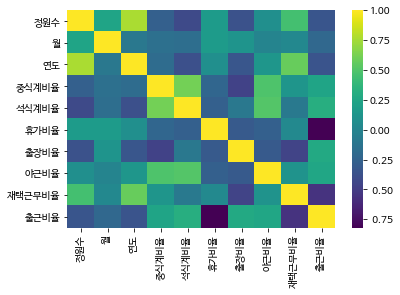

In [164]:
sns.heatmap(train_temp.corr(), cmap='viridis')
plt.show()

**상관계수를 통해 발견한 선형관계를 시각화**

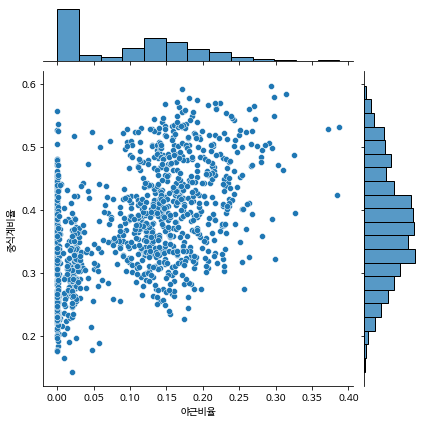

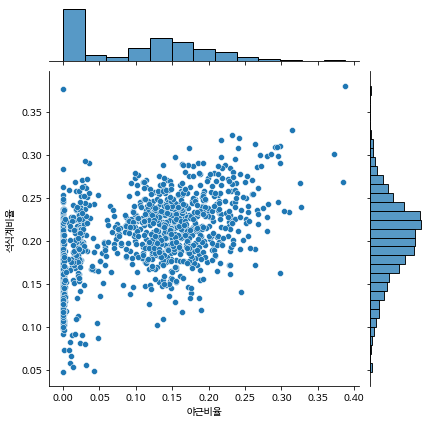

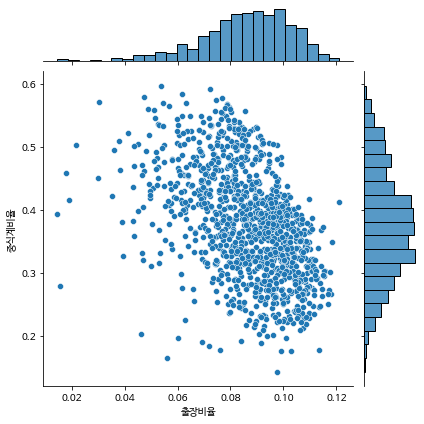

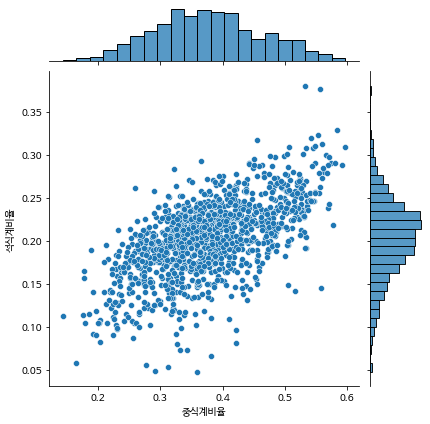

In [165]:
sns.jointplot(x='야근비율', y='중식계비율', data=train)
sns.jointplot(x='야근비율', y='석식계비율', data=train)
sns.jointplot(x='출장비율', y='중식계비율', data=train)
sns.jointplot(x='중식계비율', y='석식계비율', data=train)

# 3. 모델 구성 및 학습
[참고](https://dacon.io/competitions/official/235743/codeshare/2994?page=1&dtype=recent)

In [168]:
train.columns

Index(['일자', '요일', '정원수', '휴가', '출장', '야근', '재택근무', '중식메뉴', '석식메뉴', '중식계',
       '석식계', '월', '연도', '중식계비율', '석식계비율', '휴가비율', '출장비율', '야근비율', '재택근무비율',
       '출근비율', '중식메뉴_menu1', '중식메뉴_menu2', '중식메뉴_menu3', '석식메뉴_menu1',
       '석식메뉴_menu2', '석식메뉴_menu3'],
      dtype='object')

In [175]:
# 지수변환의 이유:  변환하지 않은 일반 그래프와 증가폭이 유사하면서 약간의 차이를 유도하는 점이 중식, 석식계 예측에 도움이 될 것이라고 생각함
train['재택근무비율'] = np.exp(train['재택근무비율'])
test['재택근무비율'] = np.exp(test['재택근무비율'])

In [187]:
# 중식계 예측 feature
train_lunch = train[['요일', '중식계', '휴가비율', '출장비율', '야근비율', '재택근무비율',
       '중식메뉴_menu1', '중식메뉴_menu2', '중식메뉴_menu3']]

# 석식계 예측 feature
train_dinner = train[['요일', '석식계', '휴가비율', '출장비율', '야근비율', '재택근무비율',
       '석식메뉴_menu1', '석식메뉴_menu2', '석식메뉴_menu3']]

pycaret은 기존에 있던 Scikit-learn, XGBoost, LightGBM, spaCy 등 여러가지 머신러닝 라이브러리를 ML High-Level API로 제작한 라이브러리다. 단 몇 줄만에 데이터 분석 및 머신러닝 모델 성능 비교까지 가능하고, Log를 생성하여 이력을 남겨준다.

[[Machine Learning] pycaret을 사용한 데이터 분석](https://velog.io/@devseunggwan/Machine-Learning-pycaret%EC%9D%84-%EC%82%AC%EC%9A%A9%ED%95%9C-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D)

In [172]:
 !pip install catboost
 !pip install pycaret

     |████████████████████████████████| 67.4 MB 90 kB/s  eta 0:00:01
     |████████████████████████████████| 23.9 MB 71.2 MB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
     |████████████████████████████████| 264 kB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 167 kB 70.4 MB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 67.1 MB/s eta 0:00:01
     |████████████████████████████████| 81 kB 4.8 MB/s  eta 0:00:01
     |████████████████████████████████| 24.2 MB 23.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 66.8 MB/s eta 0:00:01
     |████████████████████████████████| 248 kB 65.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 67.3 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 75.1 MB/s eta 0:00:01
     |████████████████████████████████| 675 kB 64.2 MB/s eta 0:00:01
     |████████████████████████████████| 10.1 MB 64.2 MB/s eta 0:00:01

## 중식계

In [188]:
from pycaret.regression import *

reg = setup(data= train_lunch,
            target= '중식계',
            numeric_imputation = 'mean',
            normalize = True,
            silent= True)

,Description,Value
0,session_id,712
1,Target,중식계
2,Original Data,"(1161, 9)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(812, 705)"


In [189]:
# 성능이 좋은 5개의 모델을 선정하여 blended하여 사용하였음.
best_5_l = compare_models(sort='MAE', n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,78.7101,10213.3430,100.2613,0.7628,0.1235,0.0951,1.1990
rf,Random Forest Regressor,79.4062,11082.8085,104.1808,0.7428,0.1286,0.0965,0.4860
gbr,Gradient Boosting Regressor,80.5046,10902.3475,103.4722,0.7480,0.1275,0.0979,0.1640
lightgbm,Light Gradient Boosting Machine,82.6549,11637.4228,107.0455,0.7294,0.1336,0.1010,0.0500
xgboost,Extreme Gradient Boosting,82.9974,11671.9520,107.0199,0.7282,0.1298,0.1000,10.2990
lasso,Lasso Regression,83.3788,11303.7905,105.8357,0.7370,0.1324,0.1022,0.0100
et,Extra Trees Regressor,83.8474,12175.1738,109.4833,0.7170,0.1342,0.1017,0.6790
br,Bayesian Ridge,85.8489,11650.2861,107.4044,0.7290,0.1344,0.1051,0.2540
knn,K Neighbors Regressor,88.5039,12600.8562,111.4707,0.7070,0.1376,0.1083,0.0570
ada,AdaBoost Regressor,90.0522,13383.6299,115.2233,0.6902,0.1430,0.1110,0.1320


In [190]:
blended_l = blend_models(estimator_list = best_5_l, fold = 5, optimize = 'MAE')
pred_holdout = predict_model(blended_l)
final_model_l = finalize_model(blended_l)
pred_esb_l = predict_model(final_model_l, test)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,79.0947,10396.3489,101.9625,0.7758,0.1327,0.1005
1,77.9248,10349.8512,101.7342,0.7770,0.1352,0.1017
2,75.7539,9292.2170,96.3961,0.7729,0.1268,0.0987
3,75.8899,10177.2025,100.8821,0.7484,0.1110,0.0829
4,81.0953,11573.3296,107.5794,0.7371,0.1235,0.0914
Mean,77.9517,10357.7898,101.7109,0.7623,0.1258,0.0950
SD,2.0135,727.6186,3.5619,0.0164,0.0085,0.0070


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,76.5390,10286.1667,101.4207,0.7719,0.1235,0.0913


In [191]:
pred_esb_l['Label']

0     1023.362615
1      954.115203
2      627.858255
3     1223.399076
4      991.025486
5      974.836620
6      924.638043
7      598.791588
8     1229.176039
9     1025.377719
10     817.754580
11    1306.664464
12    1085.965373
13    1038.858720
14     873.952971
15     601.291184
16    1249.075680
17    1025.380622
18     860.306440
19     824.920991
20     572.339985
21    1070.599985
22     976.361933
23     890.981986
24     618.348281
25    1270.933289
26    1101.852440
27    1020.146052
28     908.314275
29     684.951569
30    1270.125702
31     976.646089
32    1038.752336
33     882.549037
34     600.870315
35    1181.959622
36     987.243268
37     896.647347
38     803.309003
39     593.887875
40    1197.365178
41     998.444642
42     962.210910
43     854.717456
44     562.264282
45    1203.470101
46    1023.126289
47     953.165699
48     877.342884
49     583.652199
Name: Label, dtype: float64

In [192]:
submission_esb = pd.read_csv('sample_submission.csv')
submission_esb['중식계'] = pred_esb_l['Label']

## 석식계

In [193]:
reg = setup(data= train_dinner,
            target= '석식계',
            numeric_imputation = 'mean',
            normalize = True,
            silent= True)

,Description,Value
0,session_id,8434
1,Target,석식계
2,Original Data,"(1161, 9)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(812, 783)"


In [194]:
best_5_d = compare_models(sort='MAE', n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,50.8775,4591.2773,67.5386,0.5907,0.1618,0.1200,1.2690
rf,Random Forest Regressor,52.6281,4788.7584,68.8973,0.5718,0.1644,0.1233,0.5170
lightgbm,Light Gradient Boosting Machine,53.4076,4846.3106,69.3993,0.5659,0.1637,0.1243,0.0350
gbr,Gradient Boosting Regressor,53.4427,4881.0415,69.6212,0.5646,0.1658,0.1258,0.1700
et,Extra Trees Regressor,53.7884,5019.0395,70.7370,0.5547,0.1668,0.1258,0.6870
xgboost,Extreme Gradient Boosting,54.6446,5236.4798,71.9998,0.5335,0.1722,0.1287,10.0630
lasso,Lasso Regression,58.9718,5699.2227,75.3828,0.4955,0.1825,0.1417,0.0200
br,Bayesian Ridge,59.1193,5728.8556,75.5516,0.4929,0.1826,0.1417,0.5440
knn,K Neighbors Regressor,59.6410,6217.0648,78.6025,0.4464,0.1861,0.1399,0.0580
ada,AdaBoost Regressor,59.7338,5957.0041,77.1037,0.4735,0.1847,0.1423,0.1390


In [196]:
blended_d = blend_models(estimator_list = best_5_d, fold = 5, optimize = 'MAE')
pred_holdout = predict_model(blended_d)
final_model_d = finalize_model(blended_d)
pred_esb_d = predict_model(final_model_d, test)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,51.4511,4545.2801,67.4187,0.6088,0.1610,0.1211
1,54.4469,5439.4118,73.7524,0.5261,0.1736,0.1274
2,47.2311,3827.9517,61.8704,0.6584,0.1584,0.1160
3,53.7328,4724.4125,68.7344,0.5716,0.1552,0.1225
4,48.1657,3984.7716,63.1250,0.6790,0.1521,0.1120
Mean,51.0055,4504.3655,66.9802,0.6088,0.1601,0.1198
SD,2.8910,574.7904,4.2451,0.0559,0.0074,0.0053


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,52.1831,5359.5819,73.2092,0.5773,0.1790,0.1293


In [197]:
pred_esb_d['Label']

0     406.573451
1     413.594125
2     255.375425
3     485.888140
4     397.235659
5     453.671529
6     424.033006
7     337.111950
8     564.440130
9     439.170840
10    309.145277
11    662.304991
12    580.758582
13    407.172954
14    467.974682
15    336.310127
16    613.174739
17    549.905539
18    369.057243
19    442.916232
20    261.472714
21    622.526402
22    456.712995
23    471.463231
24    321.818928
25    640.881775
26    614.542462
27    422.768510
28    456.039361
29    265.377571
30    662.644220
31    501.133011
32    405.108206
33    441.403755
34    259.380650
35    608.807390
36    522.595896
37    370.716333
38    395.626302
39    260.763859
40    595.112691
41    473.247106
42    394.238285
43    392.909824
44    246.118308
45    602.866441
46    497.713782
47    395.181710
48    438.634689
49    268.311146
Name: Label, dtype: float64

In [198]:
submission_esb['석식계'] = pred_esb_d['Label']
submission_esb

,일자,중식계,석식계
0,2021-01-27,1023.362615,406.573451
1,2021-01-28,954.115203,413.594125
2,2021-01-29,627.858255,255.375425
3,2021-02-01,1223.399076,485.888140
4,2021-02-02,991.025486,397.235659
5,2021-02-03,974.836620,453.671529
6,2021-02-04,924.638043,424.033006
7,2021-02-05,598.791588,337.111950
8,2021-02-08,1229.176039,564.440130
9,2021-02-09,1025.377719,439.170840


# 예측결과 분포 비교

<AxesSubplot:>

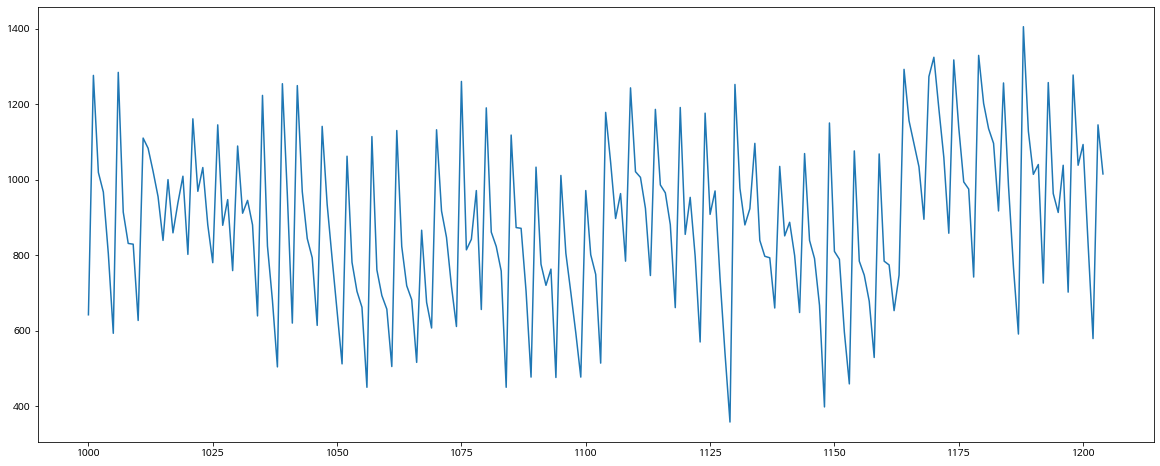

In [199]:
plt.figure(figsize=(20,8))
train.loc[1000:,'중식계'].plot()

<AxesSubplot:>

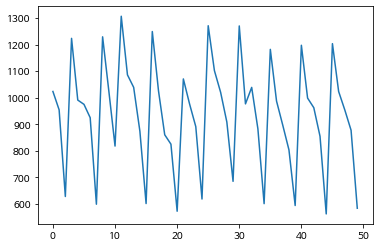

In [200]:
submission_esb['중식계'].plot()

<AxesSubplot:>

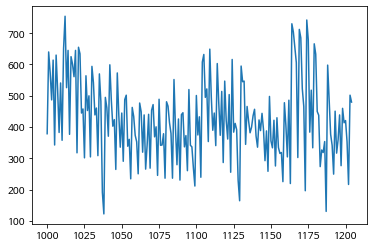

In [201]:
train.loc[1000:,'석식계'].plot()

<AxesSubplot:>

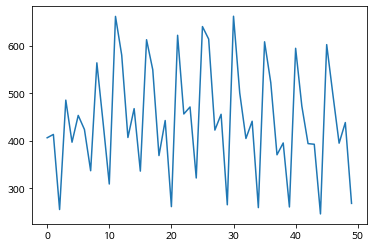

In [202]:
submission_esb['석식계'].plot()